In [2]:
# Importing Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

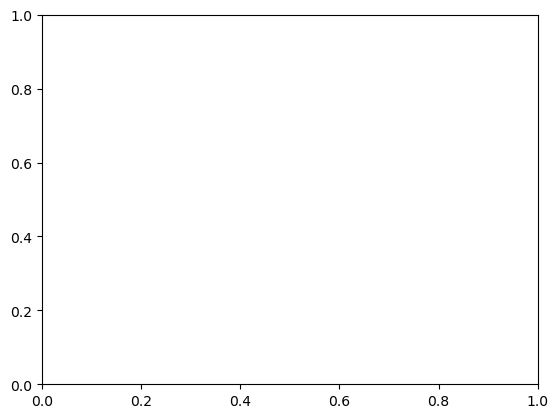

In [3]:
fig, ax = plt.subplots()

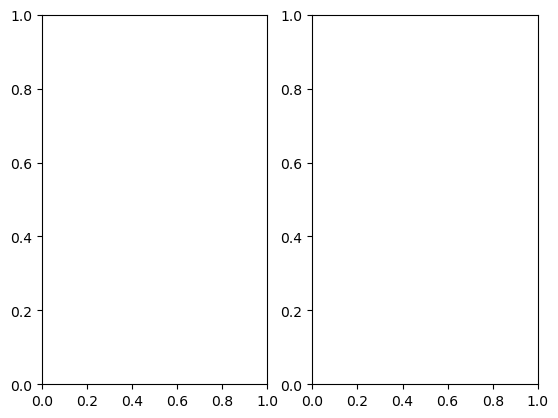

In [4]:
fig, ax = plt.subplots(1, 2)

In [11]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [12]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

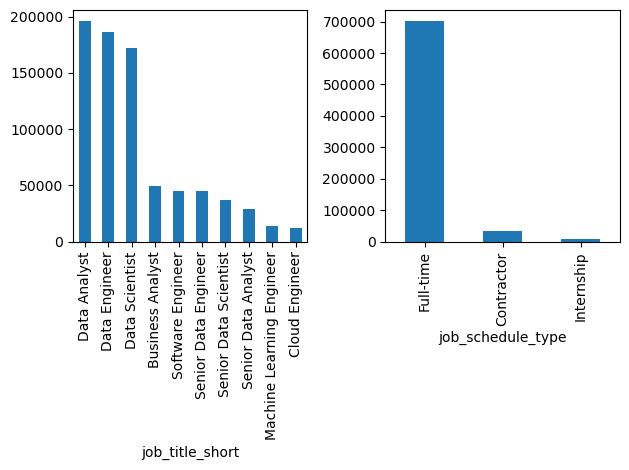

In [13]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

fig.tight_layout()

<BarContainer object of 3 artists>

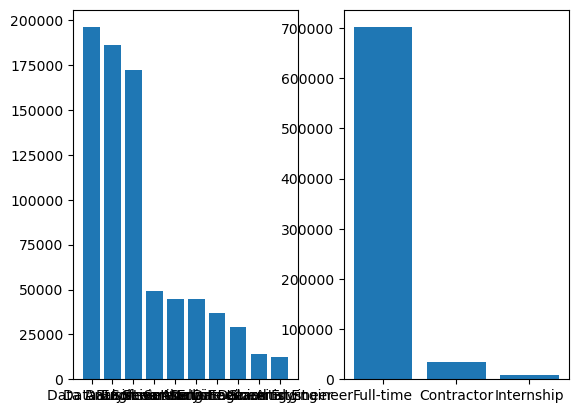

In [14]:
fig, ax = plt.subplots(1, 2)
ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

In [15]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [16]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

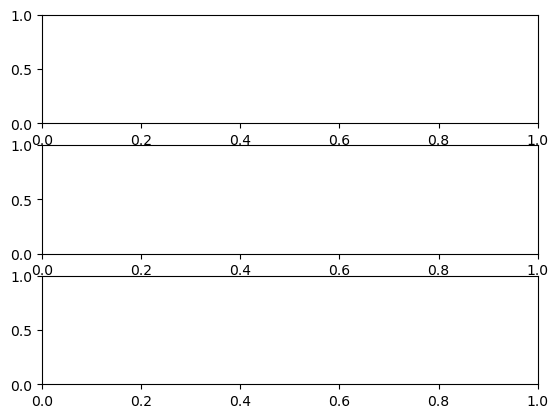

In [17]:
fig, ax = plt.subplots(3, 1)

In [ ]:
# showing how enumerate works 
for i, job_title in enumerate(job_titles):
    print(i, job_title)


0 Data Scientist
1 Data Engineer
2 Data Analyst


     job_skills job_title_short  skill_count
1480     python  Data Scientist       113711
1823        sql  Data Scientist        78982
1518          r  Data Scientist        59566
1637        sas  Data Scientist        29534
1943    tableau  Data Scientist        29445
     job_skills job_title_short  skill_count
1822        sql   Data Engineer       113130
1479     python   Data Engineer       108022
141         aws   Data Engineer        62049
151       azure   Data Engineer        60674
1772      spark   Data Engineer        53656
     job_skills job_title_short  skill_count
1821        sql    Data Analyst        92428
558       excel    Data Analyst        66860
1478     python    Data Analyst        57190
1941    tableau    Data Analyst        46455
1410   power bi    Data Analyst        39380


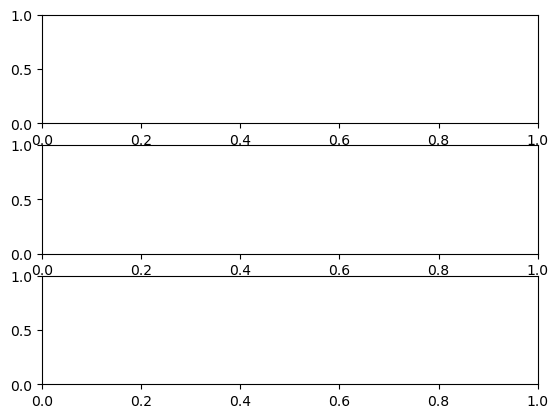

In [ ]:
# while looping: Filtering our df --> df_skills using the [job_titles] list that we made earlier  
# The print it to see if the filtering works 

fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    print( df_skills_count[df_skills_count['job_title_short']== job_title].head(5))

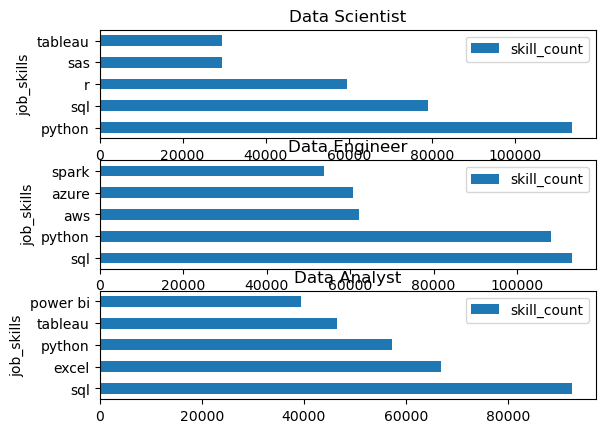

In [ ]:
# Set the df_skills_count that we filtered inot new df-variable --> which is df_plot
# Apply the .plo() method on this new DataFrame --> df_plot

fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']== job_title].head(5)
    df_plot.plot(
        kind='barh',
        x='job_skills',
        y='skill_count',
        ax=ax[i],
        title= job_title
    )

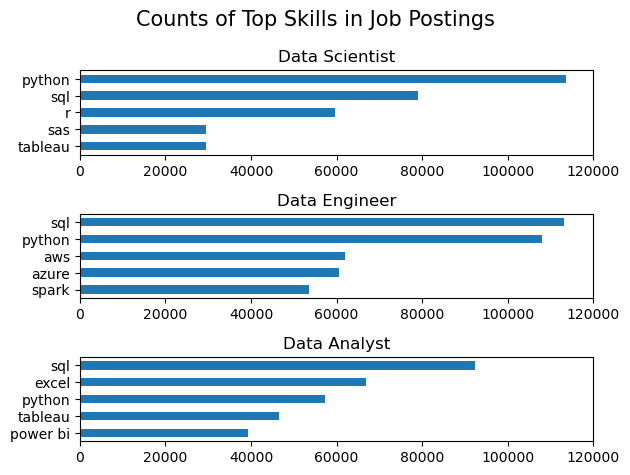

In [ ]:
# Just plot formatting
# Notice: here we need to call out the access specifically --> ax[i].

fig, ax = plt.subplots(3, 1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']== job_title].head(5)
    df_plot.plot(kind='barh', ax=ax[i], x='job_skills', y='skill_count', title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()